# Import Libraries

In [3]:
import numpy as np
import mpmath as mp 
from scipy.optimize import fsolve
from scipy.special import gammainc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import scipy.interpolate as interpolate
from statistics import mean
from scipy.optimize import fsolve

# ZAMS Fit

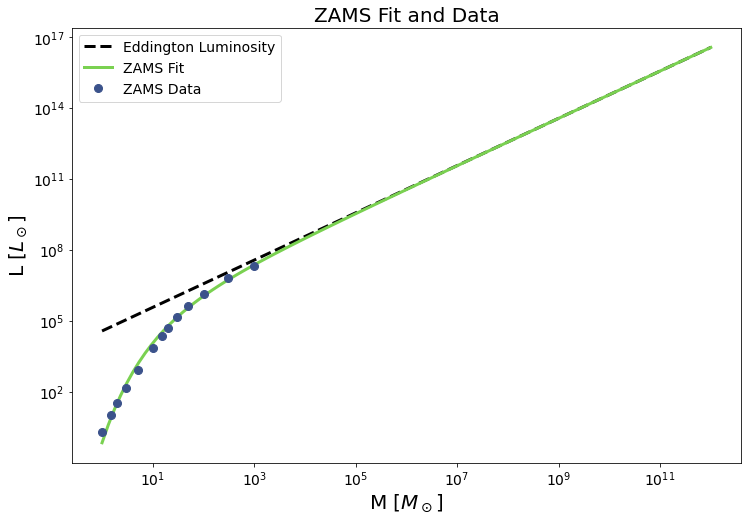

In [2]:
#constants
Lsun       = 3.846e33
LeddFactor = 3.7142e4

#load the data
L = np.power(10,[0.2825, 1.0227, 1.5177, 2.1654, 2.9274, 3.8618, 4.3647, 4.7082, 5.1619, 5.6283, 6.1470, 6.8172, 7.3047])
M = [1, 1.5, 2, 3, 5, 10, 15, 20, 30, 50, 100, 300, 1000]

#load the fit
Msun  = np.logspace(0,12,100)
Lfit1 = (10**(np.log10(LeddFactor*Lsun)/(1+np.exp(-0.8502*np.log10(Msun)-1.9551))))
Lfit2 = (Msun**(2.0135/Msun**(0.4817)+1))
Lfit  = (Lfit1*Lfit2)/Lsun

#calculate eddington luminosity
Ledd = Msun*LeddFactor;

palette = plt.get_cmap('viridis')
fig = plt.figure(figsize = (12,8))
plt.loglog(Msun, Ledd, color = 'black', ls = '--', lw = 3, label = 'Eddington Luminosity')
plt.loglog(Msun, Lfit, '-', color = palette(0.8), lw = 3, label = 'ZAMS Fit')
plt.loglog(M,L, 'o', color = palette(0.25), markersize = 8, label = 'ZAMS Data')
plt.xlabel('M [$M_\odot$]', fontsize = 20)
plt.ylabel('L [$L_\odot$]', fontsize = 20)
plt.tick_params(labelsize = 14)
plt.legend(fontsize = 14)
plt.title('ZAMS Fit and Data', fontsize = 20)
plt.savefig('zamsfit.png', dpi = 200)
plt.show()

# Heat Maps

In [3]:
rhodm = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
mchi = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
strong = np.genfromtxt('strong_limit_data.csv',delimiter = ',')
weak = np.genfromtxt('weak_limit_data.csv', delimiter = ',')

### Weak Limit

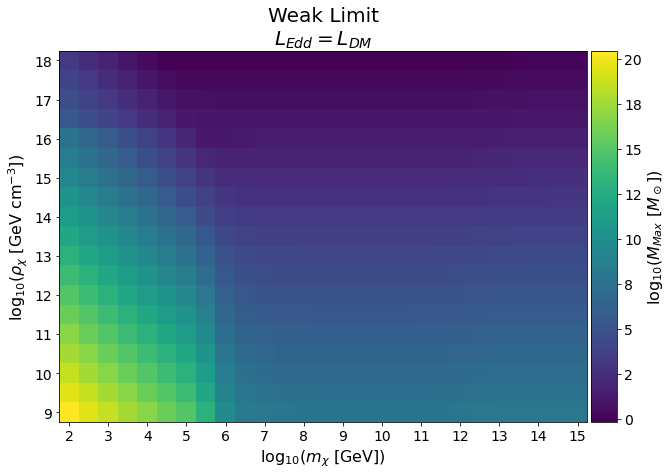

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmap = plt.get_cmap('viridis')
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(np.log10(np.transpose(weak)), cmap)
x_label_list = mchi
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])
ax.set_xticklabels(x_label_list)
y_label_list = rhodm
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax.set_yticklabels(y_label_list)
plt.xlabel('$\log_{10}(m_{\chi}$ [GeV])', fontsize = 16)
plt.ylabel('$\log_{10}(\\rho_\chi$ [GeV cm$^{-3}$])', fontsize = 16)
plt.gca().invert_yaxis()
plt.tick_params(labelsize = 14)
plt.title('Weak Limit\n$L_{Edd} = L_{DM}$', fontsize = 20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax, label = '$M_{Max}$', format='%.f')
cbar.set_label('$\log_{10}\\left(M_{Max} ~ [M_\odot]\\right)$', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.savefig('weak_limit.png', dpi = 200)
plt.show()

### Strong Limit

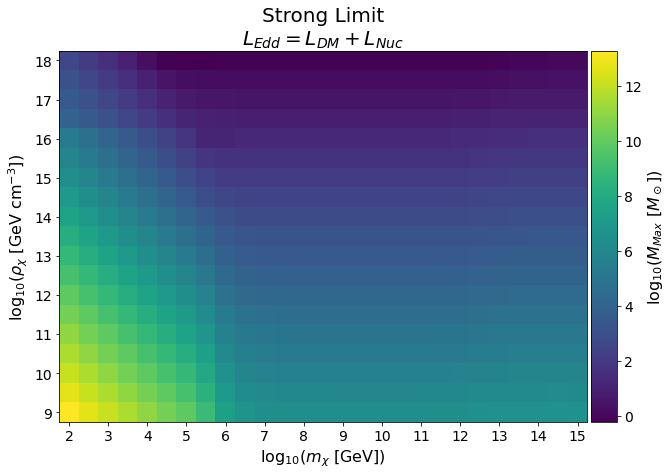

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmap = plt.get_cmap('viridis')
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(np.log10(np.transpose(strong)), cmap)
x_label_list = mchi
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])
ax.set_xticklabels(x_label_list)
y_label_list = rhodm
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax.set_yticklabels(y_label_list)
plt.xlabel('$\log_{10}(m_{\chi}$ [GeV])', fontsize = 16)
plt.ylabel('$\log_{10}(\\rho_\chi$ [GeV cm$^{-3}$])', fontsize = 16)
plt.gca().invert_yaxis()
plt.tick_params(labelsize = 14)
plt.title('Strong Limit\n$L_{Edd} = L_{DM} + L_{Nuc}$', fontsize = 20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax, label = '$M_{Max}$', format='%.f')
cbar.set_label('$\log_{10}\\left(M_{Max} ~ [M_\odot]\\right)$', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.savefig('strong_limit.png', dpi = 200)
plt.show()

### Both on One Plot

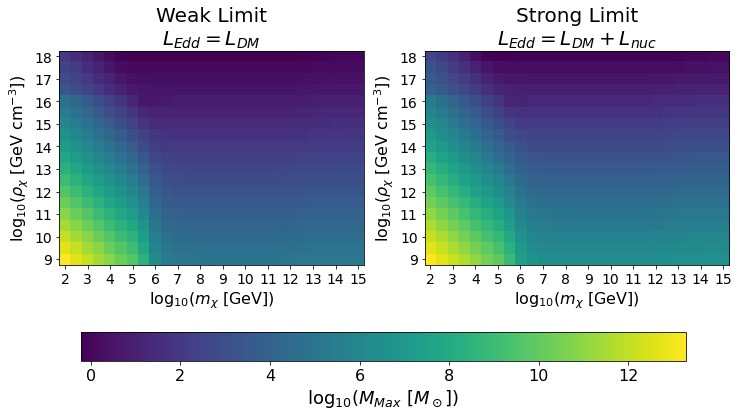

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(figsize = (12,8),
                                 nrows = 1,
                                 ncols = 2)

imgs = [weak, strong]
title = ['Weak Limit\n$L_{Edd} = L_{DM}$', 'Strong Limit\n$L_{Edd} = L_{DM} + L_{nuc}$' ]
N = 0
for ax in axes.flat:
    im = ax.imshow(np.log10(np.transpose(imgs[N])), cmap)
    x_label_list = mchi
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])
    ax.set_xticklabels(x_label_list)
    y_label_list = rhodm
    ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
    ax.set_yticklabels(y_label_list)
    ax.set_xlabel('$\log_{10}(m_{\chi}$ [GeV])', fontsize = 16)
    ax.set_ylabel('$\log_{10}(\\rho_\chi$ [GeV cm$^{-3}$])', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.set_title(title[N], fontsize = 20)
    ax.invert_yaxis()
    N += 1

cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.05])
cbar = fig.colorbar(im, cax = cbar_ax,
                    orientation = 'horizontal')
cbar.set_label('$\log_{10}\\left(M_{Max} ~ [M_\odot]\\right)$', fontsize=18)
cbar.ax.tick_params(labelsize=16)
plt.savefig('weak-strong-limit-subplots.png', dpi = 200)

# Mass Radius Homology

The broken power law fit for these data is:

\begin{equation}
R = 0.88212826928M^{0.20520031}, M < 20M_\odot
\end{equation}

\begin{equation}
R = 0.32523391725M^{0.55009911}, M > 20M_\odot
\end{equation}

where M is in units of solar masses and R is in units of solar radii.

In [6]:
#mass radius homology function
# take in M in solar mass, get out R in solar radii
def radius(M):
    if (M < 20):
        R = (10**(-0.05446826122331766))*M**(0.2052003119663239)
    elif (M == 20):
        R = ((10**(-0.05446826122331766))*M**(0.2052003119663239) + (10**(-0.4878041731674357))*M**(0.5500991134252413))/2
    elif (M > 20):
        R = (10**(-0.4878041731674357))*M**(0.5500991134252413)
    return R

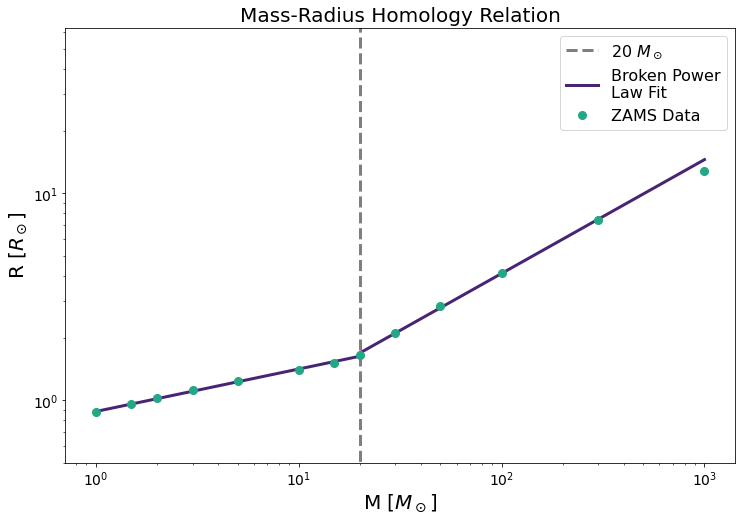

In [39]:
#constants
Lsun       = 3.846e33
LeddFactor = 3.7142e4

#load the data
M = [1, 1.5, 2, 3, 5, 10, 15, 20, 30, 50, 100, 300, 1000]
R = np.power(10,[-0.0581, -0.0203, 0.0108, 0.0487, 0.0911, 0.1462, 0.1803, 0.2183, 0.3270, 0.4570, 0.6147, 0.8697, 1.1090])

# fit power law
low  = np.polyfit(np.log10(M[0:8]),np.log10(R[0:8]),1)
high = np.polyfit(np.log10(M[7:-1]),np.log10(R[7:-1]),1)
mfit_low = np.logspace(0, np.log10(20), 25)
mfit_high = np.logspace(np.log10(20), 3, 25)
r_low = (10**(low[1]))*mfit_low**(low[0])
r_high = (10**(high[1]))*mfit_high**(high[0])
mfit = np.concatenate((mfit_low, mfit_high))
r_fit = np.concatenate((r_low,r_high))


palette = plt.get_cmap('viridis')
plt.figure(figsize = (12,8))
plt.vlines(x = 20, ymin = 0, ymax = 10e2, label = '20 $M_\odot$', ls = 'dashed', lw = 3, alpha = 0.5)
plt.loglog(mfit, r_fit, color = palette(0.1), lw = 3, label = 'Broken Power\nLaw Fit')
plt.loglog(M,R, 'o', color = palette(0.6), markersize = 8, label = 'ZAMS Data')
plt.legend(fontsize = 16)
plt.ylim((0.5, 10**1.8))
plt.title('Mass-Radius Homology Relation', fontsize = 20)
plt.tick_params(labelsize = 14)
plt.legend(fontsize = 16)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize = 16)
plt.xlabel('M [$M_\odot$]', fontsize = 20)
plt.ylabel('R [$R_\odot$]', fontsize = 20)
plt.savefig('MRhomology.png', dpi = 200)
plt.show()

# Constraint Plots

## Functions

In [40]:
#mass radius homology function
# take in M in solar mass, get out R in solar radii
def radius(M):
    if (M < 20):
        R = (10**(-0.05446826122331766))*M**(0.2052003119663239)
    elif (M == 20):
        R = ((10**(-0.05446826122331766))*M**(0.2052003119663239) + (10**(-0.4878041731674357))*M**(0.5500991134252413))/2
    elif (M > 20):
        R = (10**(-0.4878041731674357))*M**(0.5500991134252413)
    return R

In [102]:
def rhs(mchi,rhochi,M,vbar):

    # Constants
    Msun = 1.9885*10**33
    Rsun = 69.634*10**9
    mn = 0.939
    c = 3*10**10
    G = 6.6743*10**(-8)
    rhochi = rhochi
    vbar = vbar
    Lsun       = 3.846*10**33
    LeddFactor = 3.7142*10**4
    nchi = rhochi/mchi; 
    f = 2/3

    # Star
    M = M
    R = radius(M)
        #stuff you calculate for star
    Vesc = np.sqrt(2*G*(M*Msun)/(R*Rsun))

    # Luminosity Calculations
        #Lnuclear
    Lfit1 = (10**(np.log10(LeddFactor*Lsun)/(1+np.exp(-0.8502*np.log10(M)-1.9551))))
    Lfit2 = (M**(2.0135/M**(0.4817)+1))
    Lnuc  = (Lfit1*Lfit2)

        #calculate eddington luminosity
    Ledd = M*LeddFactor*Lsun

    # Define right hand side
    rhs = ((Ledd - Lnuc)/(f*np.sqrt(24*np.pi)*G*(M*Msun)*(R*Rsun)*(1/vbar)))*(1/rhochi)
    return rhs

## Individual Constraints 

### Mass-Density Constraint

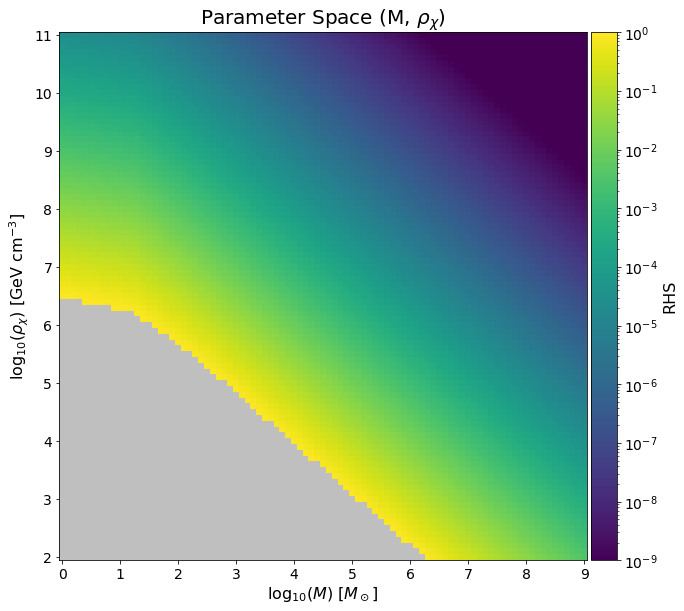

In [6]:
mchi = 1e13
vbar = 10**6
rhochi = np.logspace(2,11,91)
M = np.logspace(0,9,91)
rhochi_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
M_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rhs_ans = [[0 for i in range(len(rhochi))] for i in range(len(M))]

for i in range(len(rhochi)):
    for j in range(len(M)):
        rhs_ans[i][j] = rhs(mchi, rhochi[i], M[j], vbar)
        
rhs_ans = np.array(rhs_ans)
rhs_ans[rhs_ans > 1] = float("NaN")

np.savetxt('mass-density.csv', rhs_ans, delimiter = ',')
        
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

cmap = plt.get_cmap('viridis')
cmap.set_bad(color = 'grey', alpha = 0.5)
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(rhs_ans, cmap, norm=colors.LogNorm(vmin=0.000000001, vmax=1))
x_label_list = rhochi_list
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_yticklabels(x_label_list)
y_label_list = M_list
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xticklabels(y_label_list)
plt.ylabel('$\log_{10}\\left(\\rho_\chi\\right)$ [GeV cm$^{-3}$]', fontsize = 16)
plt.xlabel('$\log_{10}\\left(M\\right)~ [M_\odot]$', fontsize = 16)
plt.gca().invert_yaxis()
plt.tick_params(labelsize = 14)
plt.title('Parameter Space (M, $\\rho_\chi$)', fontsize = 20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax, label = 'RHS')
cbar.set_label('RHS', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.savefig('mass_density_paramter_space.png', dpi = 200)
plt.show()

### Mass-$\bar{v}$ Constraint

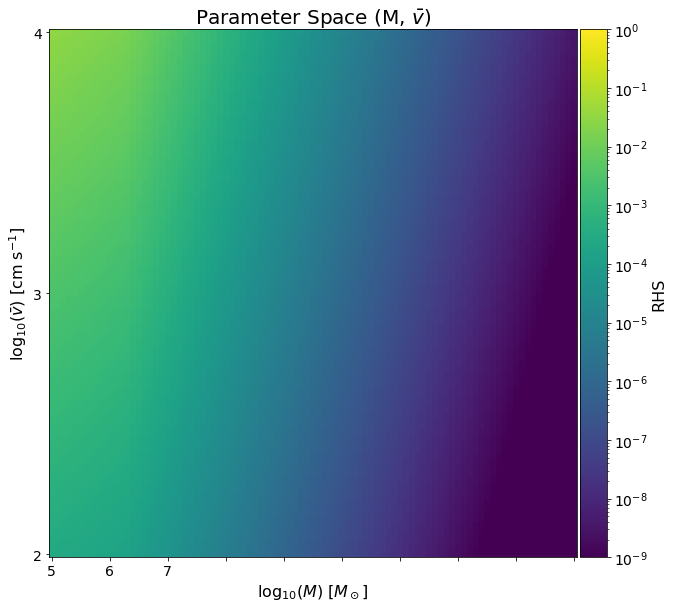

In [7]:
mchi = 1e13
vbar = np.logspace(5,7,91)
rhochi = 10**9
M = np.logspace(0,9,91)
vbar_list = [5, 6, 7]
M_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rhs_ans = [[0 for i in range(len(vbar))] for i in range(len(M))]

for i in range(len(vbar)):
    for j in range(len(M)):
        rhs_ans[i][j] = rhs(mchi, rhochi, M[j], vbar[i])
        
rhs_ans = np.array(rhs_ans)
rhs_ans[rhs_ans > 1] = float("NaN")

np.savetxt('mass-vbar.csv', rhs_ans, delimiter = ',')
        
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

cmap = plt.get_cmap('viridis')
cmap.set_bad(color = 'grey', alpha = 0.5)
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(rhs_ans, cmap, norm=colors.LogNorm(vmin=0.000000001, vmax=1))
y_label_list = vbar_list
ax.set_yticks([0, 45, 90])
ax.set_yticklabels(x_label_list)
x_label_list = M_list
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xticklabels(y_label_list)
plt.ylabel('$\log_{10}\\left(\\bar{v}\\right)$ [cm s$^{-1}$]', fontsize = 16)
plt.xlabel('$\log_{10}\\left(M\\right)~ [M_\odot]$', fontsize = 16)
plt.gca().invert_yaxis()
plt.tick_params(labelsize = 14)
plt.title('Parameter Space (M, $\\bar{v}$)', fontsize = 20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax, label = 'RHS')
cbar.set_label('RHS', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.savefig('mass_vbar_paramter_space.png', dpi = 200)
plt.show()

### M-$m_\chi$ Constraint

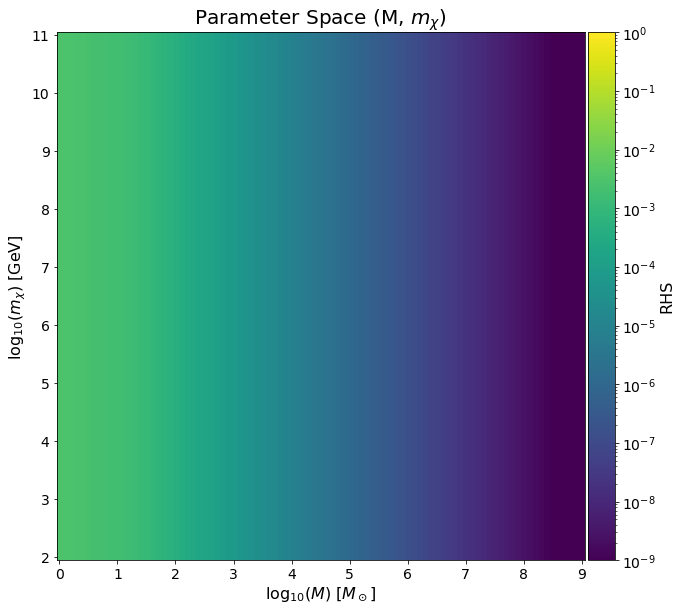

In [8]:
mchi = np.logspace(2,11,91)
vbar = 10**6
rhochi = 10**9
M = np.logspace(0,9,91)
mchi_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
M_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rhs_ans = [[0 for i in range(len(mchi))] for i in range(len(M))]

for i in range(len(mchi)):
    for j in range(len(M)):
        rhs_ans[i][j] = rhs(mchi[i], rhochi, M[j], vbar)
        
rhs_ans = np.array(rhs_ans)
rhs_ans[rhs_ans > 1] = float("NaN")

np.savetxt('mass-mchi.csv', rhs_ans, delimiter = ',')
        
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

cmap = plt.get_cmap('viridis')
cmap.set_bad(color = 'grey', alpha = 0.5)
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(rhs_ans, cmap, norm=colors.LogNorm(vmin=0.000000001, vmax=1))
x_label_list = mchi_list
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_yticklabels(x_label_list)
y_label_list = M_list
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xticklabels(y_label_list)
plt.ylabel('$\log_{10}\\left(m_\chi\\right)$ [GeV]', fontsize = 16)
plt.xlabel('$\log_{10}\\left(M\\right)~ [M_\odot]$', fontsize = 16)
plt.gca().invert_yaxis()
plt.tick_params(labelsize = 14)
plt.title('Parameter Space (M, $m_\chi$)', fontsize = 20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax, label = 'RHS')
cbar.set_label('RHS', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.savefig('mass_mchi_paramter_space.png', dpi = 200)
plt.show()

### $\rho_\chi$-$\bar{v}$ Constraint

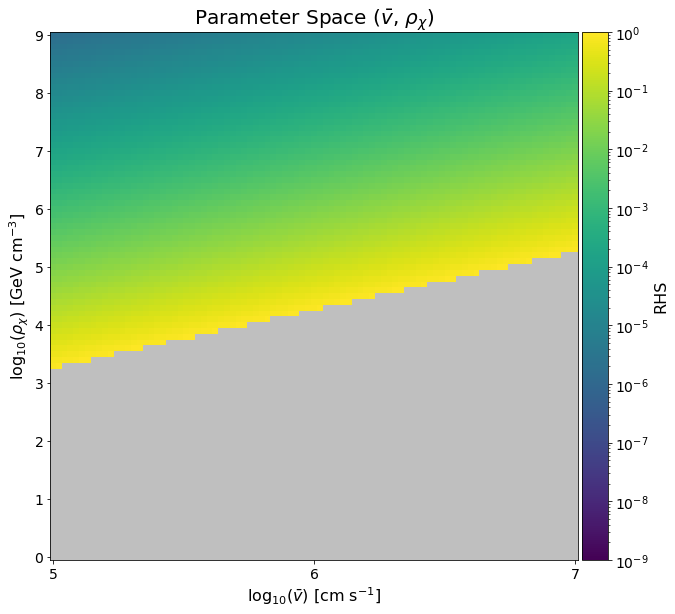

In [9]:
mchi = 1e13
vbar = np.logspace(5,7,91)
rhochi = np.logspace(2,11,91)
M = 10
rhochi_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
vbar_list = [5, 6, 7]

rhs_ans = [[0 for i in range(len(rhochi))] for i in range(len(vbar))]

for i in range(len(rhochi)):
    for j in range(len(vbar)):
        rhs_ans[i][j] = rhs(mchi, rhochi[i], M, vbar[j])
        
rhs_ans = np.array(rhs_ans)
rhs_ans[rhs_ans > 1] = float("NaN")

np.savetxt('density-vbar.csv', rhs_ans, delimiter = ',')

        
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

cmap = plt.get_cmap('viridis')
cmap.set_bad(color = 'grey', alpha = 0.5)
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(rhs_ans, cmap, norm=colors.LogNorm(vmin=0.000000001, vmax=1))
x_label_list = vbar_list
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_yticklabels(y_label_list)
y_label_list = rhochi_list
ax.set_xticks([0, 45, 90])
ax.set_xticklabels(x_label_list)
plt.ylabel('$\log_{10}\\left(\\rho_\chi\\right)$ [GeV cm$^{-3}$]', fontsize = 16)
plt.xlabel('$\log_{10}\\left(\\bar{v}\\right)$ [cm s$^{-1}$]', fontsize = 16)
plt.gca().invert_yaxis()
plt.tick_params(labelsize = 14)
plt.title('Parameter Space ($\\bar{v}$, $\\rho_\chi$)', fontsize = 20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax, label = 'RHS')
cbar.set_label('RHS', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.savefig('density_vbar_paramter_space.png', dpi = 200)
plt.show()

### $\rho_\chi$-$m_\chi$ Constraints

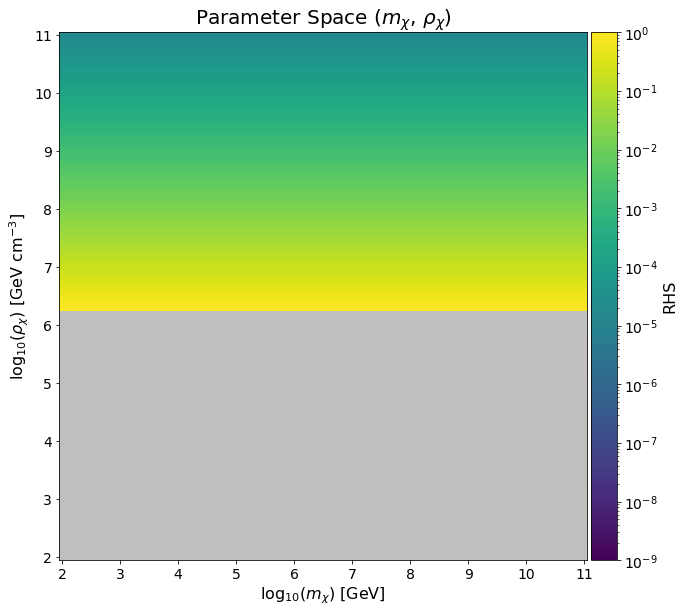

In [10]:
mchi = np.logspace(2,11,91)
vbar = 10**6
rhochi = np.logspace(2,11,91)
M = 10
rhochi_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mchi_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

rhs_ans = [[0 for i in range(len(rhochi))] for i in range(len(mchi))]

for i in range(len(rhochi)):
    for j in range(len(mchi)):
        rhs_ans[i][j] = rhs(mchi[j], rhochi[i], M, vbar)
        
rhs_ans = np.array(rhs_ans)
rhs_ans[rhs_ans > 1] = float("NaN")

np.savetxt('density-mchi.csv', rhs_ans, delimiter = ',')

        
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

cmap = plt.get_cmap('viridis')
cmap.set_bad(color = 'grey', alpha = 0.5)
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(rhs_ans, cmap, norm=colors.LogNorm(vmin=0.000000001, vmax=1))
x_label_list = mchi_list
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_yticklabels(y_label_list)
y_label_list = rhochi_list
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xticklabels(x_label_list)
plt.ylabel('$\log_{10}\\left(\\rho_\chi\\right)$ [GeV cm$^{-3}$]', fontsize = 16)
plt.xlabel('$\log_{10}\\left(m_\chi\\right)$ [GeV]', fontsize = 16)
plt.gca().invert_yaxis()
plt.tick_params(labelsize = 14)
plt.title('Parameter Space ($m_\chi$, $\\rho_\chi$)', fontsize = 20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax, label = 'RHS')
cbar.set_label('RHS', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.savefig('density_mchi_paramter_space.png', dpi = 200)
plt.show()

### $\bar{v}$-$m_\chi$ Constraints

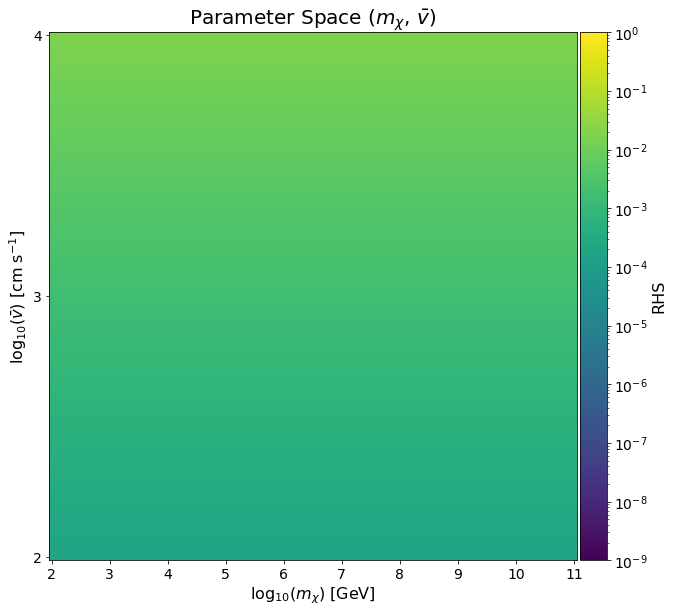

In [11]:
mchi = np.logspace(2,11,91)
vbar = np.logspace(5,7,91)
rhochi = 10**9
M = 10
vbar_list = [5, 6, 7]
mchi_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

rhs_ans = [[0 for i in range(len(vbar))] for i in range(len(mchi))]

for i in range(len(vbar)):
    for j in range(len(mchi)):
        rhs_ans[i][j] = rhs(mchi[j], rhochi, M, vbar[i])
        
rhs_ans = np.array(rhs_ans)
rhs_ans[rhs_ans > 1] = float("NaN")

np.savetxt('vbar-mchi.csv', rhs_ans, delimiter = ',')

        
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

cmap = plt.get_cmap('viridis')
cmap.set_bad(color = 'grey', alpha = 0.5)
fig, ax = plt.subplots(figsize = (10,10))
im = plt.imshow(rhs_ans, cmap, norm=colors.LogNorm(vmin=0.000000001, vmax=1))
x_label_list = mchi_list
ax.set_yticks([0, 45, 90])
ax.set_yticklabels(y_label_list)
y_label_list = vbar_list
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xticklabels(x_label_list)
plt.ylabel('$\log_{10}\\left(\\bar{v}\\right)$ [cm s$^{-1}$]', fontsize = 16)
plt.xlabel('$\log_{10}\\left(m_\chi\\right)$ [GeV]', fontsize = 16)
plt.gca().invert_yaxis()
plt.tick_params(labelsize = 14)
plt.title('Parameter Space ($m_\chi$, $\\bar{v}$)', fontsize = 20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax, label = 'RHS')
cbar.set_label('RHS', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.savefig('mchi_vbar_paramter_space.png', dpi = 200)
plt.show()

## Subplot with all

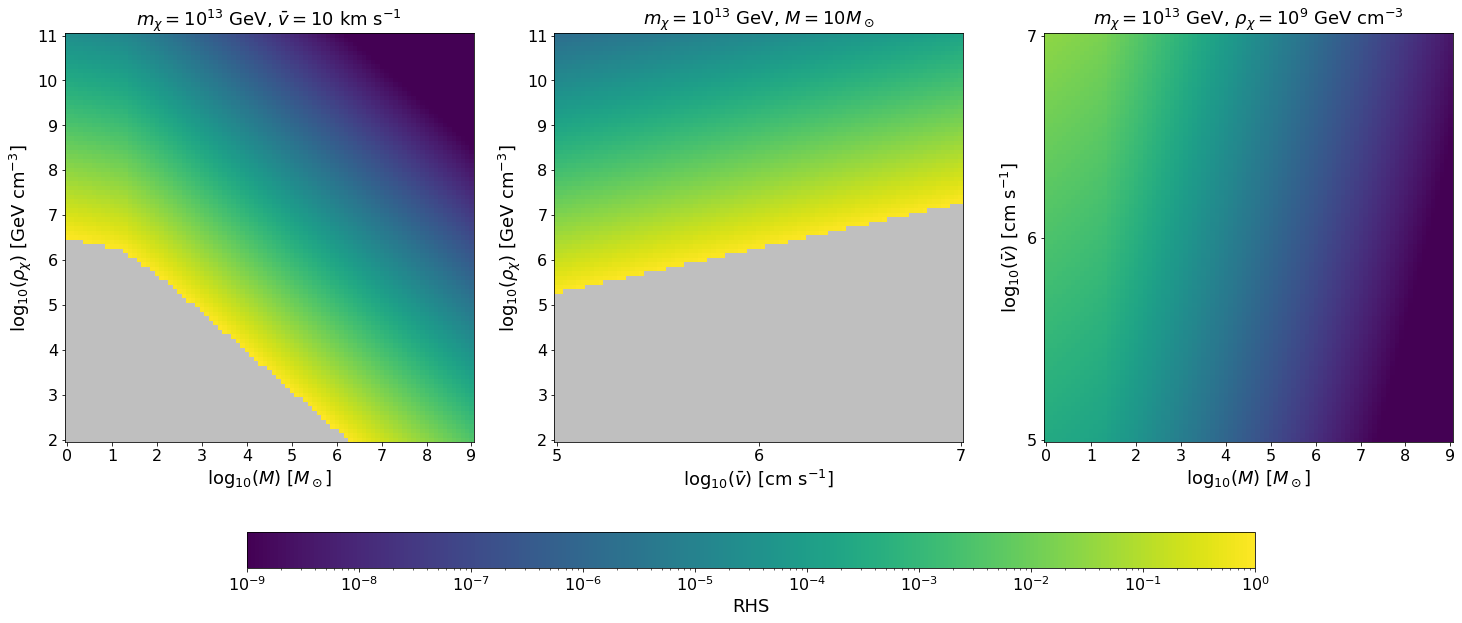

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

density_mchi = np.genfromtxt('density-mchi.csv', delimiter = ',')
density_vbar = np.genfromtxt('density-vbar.csv', delimiter = ',')
mass_density = np.genfromtxt('mass-density.csv', delimiter = ',')
mass_mchi = np.genfromtxt('mass-mchi.csv', delimiter = ',')
mass_vbar = np.genfromtxt('mass-vbar.csv', delimiter = ',')
vbar_mchi = np.genfromtxt('vbar-mchi.csv', delimiter = ',')

order = [0, 2, 1]

#axis arrays
mchi   = np.logspace(2,11,91)
vbar   = np.logspace(5,7,91)
rhochi = np.logspace(2,11,91)
M      = np.logspace(0,9,91)
rhochi_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
M_list      = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
vbar_list   = [5, 6, 7]
mchi_list   = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


imgs = [mass_density, mass_vbar, density_vbar]
yax = [rhochi, vbar, rhochi]
xax = [M, M, vbar]
yax_list = [rhochi_list, vbar_list, rhochi_list]
xax_list = [M_list, M_list, vbar_list]

y_labels = ['$\log_{10}\\left(\\rho_\chi\\right)$ [GeV cm$^{-3}$]', 
            '$\log_{10}\\left(\\bar{v}\\right)$ [cm s$^{-1}$]', 
            '$\log_{10}\\left(\\rho_\chi\\right)$ [GeV cm$^{-3}$]']

x_labels = ['$\log_{10}\\left(M\\right)$ [$M_\odot$]', 
            '$\log_{10}\\left(M\\right)$ [$M_\odot$]', 
            '$\log_{10}\\left(\\bar{v}\\right)$ [cm s$^{-1}$]']

mchi = 1e13
vbar = 10**6
rhochi = 10**9

titles = ['$m_\chi = 10^{13}$ GeV, $\\bar{v} = 10$ km s$^{-1}$',
         '$m_\chi = 10^{13}$ GeV, $\\rho_\chi = 10^{9}$ GeV cm$^{-3}$',
         '$m_\chi = 10^{13}$ GeV, $M = 10 M_\odot$']

long = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
short = [0, 45, 90]
ytick = [long, short, long]
xtick = [long, long, short]

######
# PLOT
######

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,10))
fig.tight_layout(h_pad=5, w_pad=5)
#counter
N = 0
# plot features
cmap = plt.get_cmap('viridis')
cmap.set_bad(color = 'grey', alpha = 0.5)

for ax in axes.flat:
    im = ax.imshow(imgs[order[N]], cmap, norm = colors.LogNorm(vmin = 0.000000001, vmax = 1))
    ax.set_title(titles[order[N]], fontsize = 18)
    ax.tick_params(labelsize=16)
        # axis labels
    x_label_list = xax_list[order[N]]
    ax.set_xticks(xtick[order[N]])
    ax.set_xticklabels(x_label_list)
    
    y_label_list = yax_list[order[N]]        
    ax.set_yticks(ytick[order[N]])
    ax.set_yticklabels(y_label_list)
        # axis titles
    ax.set_xlabel(x_labels[order[N]], fontsize = 18)
    ax.set_ylabel(y_labels[order[N]], fontsize = 18)
        #invert axis
    ax.invert_yaxis()
        # counter
    N += 1
    #colorbar
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.05])
cbar = fig.colorbar(im, cax = cbar_ax, label = 'RHS', orientation = 'horizontal')
cbar.set_label('RHS', fontsize=18)
cbar.ax.tick_params(labelsize=16)
plt.savefig('constraining_parameter_space.png', dpi = 250, bbox_inches='tight')
plt.show()

# Bounds

## Function

In [48]:
def sigmabounds(mchi,rhochi,M,R):

    mchi = mchi

    # Constants
    Msun = 1.9885*10**33
    Rsun = 69.634*10**9
    mn = 0.939
    c = 3*10**10
    G = 6.6743*10**(-8)
    rhochi = rhochi
    vbar = 10**6
    Lsun       = 3.846*10**33
    LeddFactor = 3.7142*10**4
    nchi = rhochi/mchi; 
    f = 2/3

    # Star
    M = M
    R = R
        #stuff you calculate for star
    Vesc = np.sqrt(2*G*(M*Msun)/(R*Rsun))

    # Luminosity Calculations
        #Lnuclear
    Lfit1 = (10**(np.log10(LeddFactor*Lsun)/(1+np.exp(-0.8502*np.log10(M)-1.9551))))
    Lfit2 = (M**(2.0135/M**(0.4817)+1))
    Lnuc  = (Lfit1*Lfit2)

        #calculate eddington luminosity
    Ledd = M*LeddFactor*Lsun

    # Define right hand side
    rhs = ((Ledd - Lnuc)/(f*np.sqrt(24*np.pi)*G*(M*Msun)*(R*Rsun)*(1/vbar)))*(1/rhochi)

    # Solve for \sigma
    tau = [0 for i in range(len(mchi))]
    sigmaBound = [0 for i in range(len(mchi))]
    An2 = [0 for i in range(len(mchi))]

    for i in range(len(mchi)):
        sigmalow = 10**(-60);              
        sigmaup = 10**(-30);               

        while (np.log10(sigmaup) - np.log10(sigmalow) >= 0.0000001):
            sigma = 10**((np.log10(sigmaup)+np.log10(sigmalow))/2)
            tau[i] = 3/2*(M*Msun)/(1.6726*10**(-24))*sigma/np.pi/(R*Rsun)**2
            lhs = 0              

            if (tau[i] <= 1):
                An2[i] = 3*Vesc**2*0.93827/(vbar**2)/mchi[i]
                lhs = (1-(1+2*0.93827/mchi[i])*np.exp(-An2[i]))*(2/tau[i]**2)*2*gammainc(3,tau[i])
            else:
                k = 1
                while (k <= 2*tau[i]+2):
                    An2[i] = 3*Vesc**2*k*0.93827/(vbar**2)/mchi[i]
                    lhs = lhs + (1-(1+2*k*0.93827/mchi[i])*np.exp(-An2[i]))*2/tau[i]**2*(k+1)*gammainc(k+2, tau[i])
                    k += 1
            if (lhs >= rhs):
                sigmaup = sigma      
            else:
                sigmalow = sigma
        sigmaBound[i] = sigma
    return sigmaBound

## Density Bounds

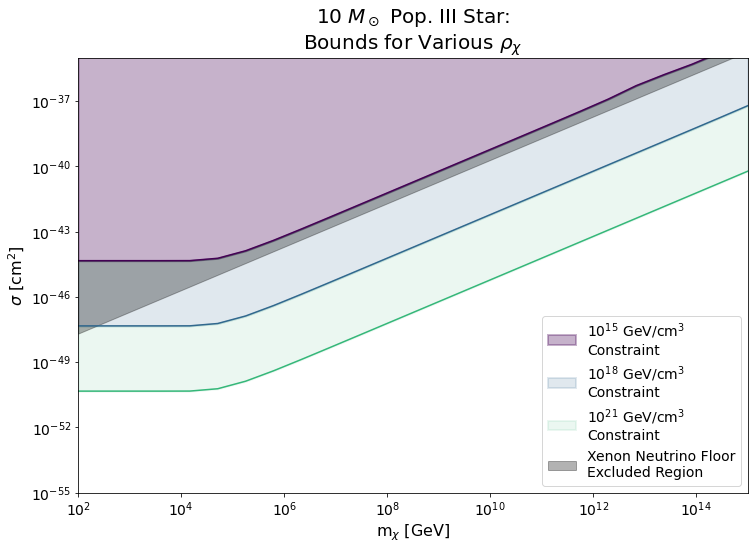

In [52]:
mchi = np.logspace(2,15,25)
rhochi = np.array([10**15, 10**18, 10**21])
M = 10
R = 10**0.1462

sigmaBounds = np.zeros((6, 25))

for i in range(len(rhochi)):
    sigmaBounds[i,:] = sigmabounds(mchi,rhochi[i],M,R)

# xenon data
mx = np.linspace(2,15,25)
XENON = 10**(0.99823116*mx-49.68264486)
mx = 10**mx

palette = plt.get_cmap('viridis')
legend = ['$10^{15}$ GeV/cm$^{3}$\nConstraint','$10^{18}$ GeV/cm$^{3}$\nConstraint',
          '$10^{21}$ GeV/cm$^{3}$\nConstraint']

plt.figure(figsize = (12,8))

for i in range(len(rhochi)):
    pal = palette(i/3)
    plt.loglog(mchi,sigmaBounds[i,:], color = pal)
    if (i == 0):
        plt.fill_between(mchi, sigmaBounds[i,:], 1e-34, facecolor=pal, 
                         color=pal, lw = 2, alpha=0.3/(i+1), label = legend[i])
    elif (i > 0):
        plt.fill_between(mchi, sigmaBounds[i,:], sigmaBounds[i-1,:], facecolor=pal, 
                         color=pal, lw = 2, alpha=0.3/(i+1), label = legend[i])
    
plt.fill_between(mx, XENON, sigmaBounds[0,:], 
             facecolor="gray", 
             color='black',
             alpha=0.3,
             label = 'Xenon Neutrino Floor\nExcluded Region')
          
plt.xlabel('m$_\chi$ [GeV]', fontsize = 16)
plt.ylabel('$\sigma$ [cm$^{2}$]', fontsize = 16)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.legend(loc = 'lower right', fontsize = 14)
plt.xlim([1e2,1e15])
plt.ylim([1e-55, 1e-35])
plt.title('10 $M_\odot$ Pop. III Star:\nBounds for Various $\\rho_\chi$', fontsize = 20)
plt.savefig('rho_chi_bounds.png', dpi = 200)
plt.show()

## Mass Bounds

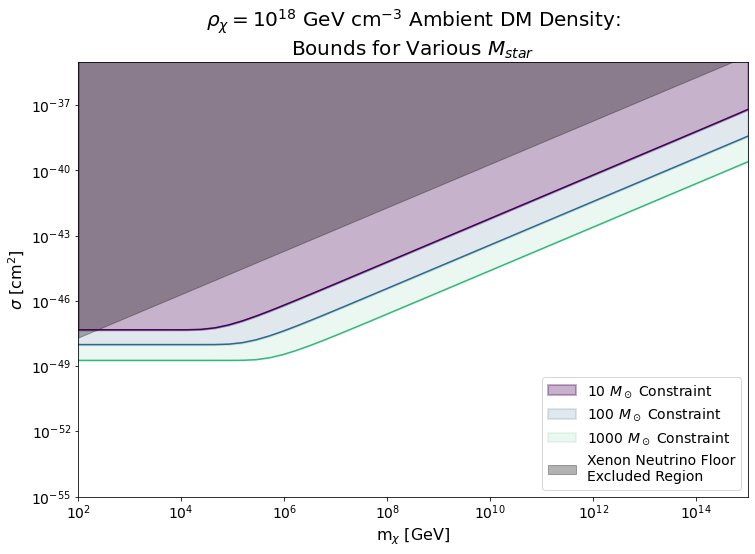

In [49]:
mchi = np.logspace(2,15,50)
rhochi = 10**18
M = np.array((10,100,1000))
R = np.array((radius(M[0]), radius(M[1]), radius(M[2])))

sigmaBounds = np.zeros((6, 50))

for i in range(len(M)):
    sigmaBounds[i,:] = sigmabounds(mchi,rhochi,M[i],R[i])

# xenon data
mx = np.linspace(2,15,25)
XENON = 10**(0.99823116*mx-49.68264486)
mx = 10**mx

palette = plt.get_cmap('viridis')
legend = ['10 $M_\odot$ Constraint','100 $M_\odot$ Constraint',
          '1000 $M_\odot$ Constraint']

plt.figure(figsize = (12,8))

for i in range(len(M)):
    pal = palette(i/3)
    plt.loglog(mchi,sigmaBounds[i,:], color = pal)
    if (i == 0):
        plt.fill_between(mchi, sigmaBounds[i,:], 1e-34, facecolor=pal, 
                         color=pal, lw = 2, alpha=0.3/(i+1), label = legend[i])
    elif (i > 0):
        plt.fill_between(mchi, sigmaBounds[i,:], sigmaBounds[i-1,:], facecolor=pal, 
                         color=pal, lw = 2, alpha=0.3/(i+1), label = legend[i])
    
plt.fill_between(mx, XENON, 1e-34, 
             facecolor="gray", 
             color='black',
             alpha=0.3,
             label = 'Xenon Neutrino Floor\nExcluded Region')
          
plt.xlabel('m$_\chi$ [GeV]', fontsize = 16)
plt.ylabel('$\sigma$ [cm$^{2}$]', fontsize = 16)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.legend(loc = 'lower right', fontsize = 14)
plt.xlim([1e2,1e15])
plt.ylim([1e-55, 1e-35])
plt.title('$ \\rho_\chi = 10^{18}$ GeV cm$^{-3}$ Ambient DM Density:\nBounds for Various $M_{star}$', fontsize = 20)
plt.savefig('M_bounds.png', dpi = 200)
plt.show()

# Semi-Analytic Bounds

## Semi-Analytic Density Plot

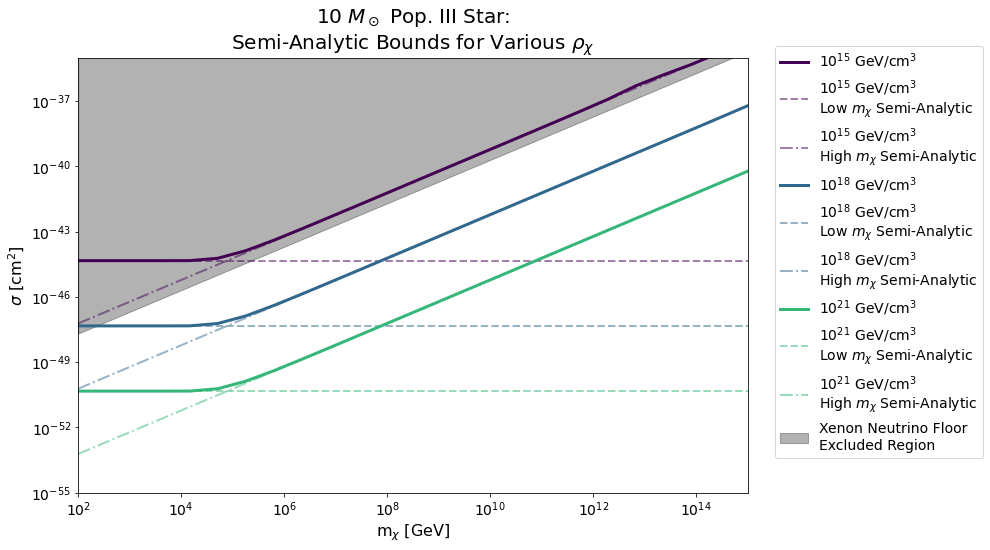

In [52]:
mchi = np.logspace(2,15,25)
rhochi = np.array([10**15, 10**18, 10**21])
M = 10
R = 10**0.1462
Msun = 1.9885*10**33
Rsun = 69.634*10**9
G = 6.6743*10**(-8)
vesc = np.sqrt(2*G*(M*Msun)/(R*Rsun))
vbar = 10**6

# numerical bounds
sigmaBounds = np.zeros((3, 25))

for i in range(len(rhochi)):
    sigmaBounds[i,:] = sigmabounds(mchi,rhochi[i],M,R)

# semi-analytical bounds
tau_semi_small = [[0 for i in range(len(mchi))] for i in range(len(rhochi))]
sigma_semi_small = [[0 for i in range(len(mchi))] for i in range(len(rhochi))]
tau_semi_large = [[0 for i in range(len(mchi))] for i in range(len(rhochi))]
sigma_semi_large = [[0 for i in range(len(mchi))] for i in range(len(rhochi))]
A12 = [0 for i in range(len(mchi))]

for i in range(len(mchi)):
    for j in range(len(rhochi)):
        tau_semi_small[j][i] = (3/2)*rhs(mchi[i],rhochi[j],M,vbar)
        sigma_semi_small[j][i] = tau_semi_small[j][i]*(2/3)*(1.6726*10**(-24))/(M*Msun)*np.pi*(R*Rsun)**2
        
        A12[i] = 3*(vesc**2)*(0.93827)/(vbar**2)/mchi[i];
        tau_semi_large[j][i] = (1/A12[i])*(3/2)*rhs(mchi[i],rhochi[j],M,vbar)
        sigma_semi_large[j][i] = tau_semi_large[j][i]*(2/3)*(1.6726*10**(-24))/(M*Msun)*np.pi*(R*Rsun)**2
    
# xenon data
mx = np.linspace(2,15,25)
XENON = 10**(0.99823116*mx-49.68264486)
mx = 10**mx

# plot
palette = plt.get_cmap('viridis')
legend = ['$10^{15}$ GeV/cm$^{3}$','$10^{18}$ GeV/cm$^{3}$','$10^{21}$ GeV/cm$^{3}$']

plt.figure(figsize = (12,8))

for i in range(len(rhochi)):
    pal = palette(i/3)
    plt.loglog(mchi,sigmaBounds[i,:], lw = 3, color = pal, label = legend[i])
    plt.loglog(mchi, np.array(sigma_semi_small[:][i]).transpose(), 
               color = pal, label = f'{legend[i]}\nLow $m_\chi$ Semi-Analytic',
              alpha = 0.5, ls = 'dashed', lw = 2)
    plt.loglog(mchi, np.array(sigma_semi_large[:][i]).transpose(), 
           color = pal, label = f'{legend[i]}\nHigh $m_\chi$ Semi-Analytic',
          alpha = 0.5, ls = '-.', lw = 2)
    
plt.fill_between(mx, XENON, 1e-34, 
             facecolor="gray", 
             color='black',
             alpha=0.3,
             label = 'Xenon Neutrino Floor\nExcluded Region')
          
plt.xlabel('m$_\chi$ [GeV]', fontsize = 16)
plt.ylabel('$\sigma$ [cm$^{2}$]', fontsize = 16)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.legend(loc=(1.04,0.08), fontsize = 14)
plt.xlim([1e2,1e15])
plt.ylim([1e-55, 1e-35])
plt.title('10 $M_\odot$ Pop. III Star:\nSemi-Analytic Bounds for Various $\\rho_\chi$', fontsize = 20)
plt.savefig('semi-analytic-density-bounds.png', dpi = 200, bbox_inches='tight')
plt.show()

## Semi-Analytic Mass Plot

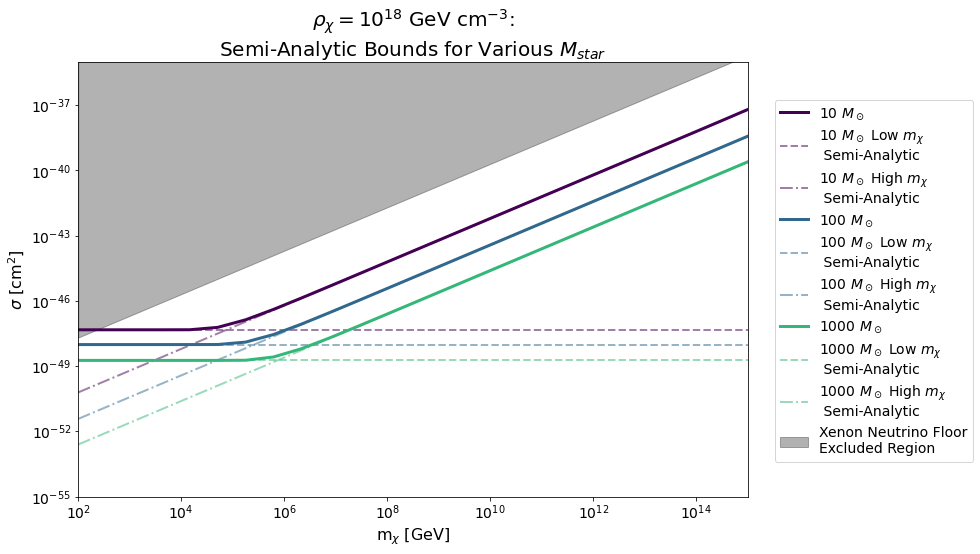

In [59]:
mchi = np.logspace(2,15,25)
rhochi = 10**18
M = np.array((10,100,1000))
R = np.array((radius(M[0]),radius(M[1]),radius(M[2])))
Msun = 1.9885*10**33
Rsun = 69.634*10**9
G = 6.6743*10**(-8)
vesc = np.sqrt(2*G*(M*Msun)/(R*Rsun))
vbar = 10**6

# numerical bounds
sigmaBounds = np.zeros((3, 25))

for i in range(len(M)):
    sigmaBounds[i,:] = sigmabounds(mchi,rhochi,M[i],R[i])

# semi-analytical bounds
tau_semi_small = [[0 for i in range(len(mchi))] for i in range(len(M))]
sigma_semi_small = [[0 for i in range(len(mchi))] for i in range(len(M))]
tau_semi_large = [[0 for i in range(len(mchi))] for i in range(len(M))]
sigma_semi_large = [[0 for i in range(len(mchi))] for i in range(len(M))]
A12 = [0 for i in range(len(mchi))]

for i in range(len(mchi)):
    for j in range(len(M)):
        tau_semi_small[j][i] = (3/2)*rhs(mchi[i],rhochi,M[j],vbar)
        sigma_semi_small[j][i] = tau_semi_small[j][i]*(2/3)*(1.6726*10**(-24))/(M[j]*Msun)*np.pi*(R[j]*Rsun)**2
        
        A12[i] = 3*(vesc[j]**2)*(0.93827)/(vbar**2)/mchi[i];
        tau_semi_large[j][i] = (1/A12[i])*(3/2)*rhs(mchi[i],rhochi,M[j],vbar)
        sigma_semi_large[j][i] = tau_semi_large[j][i]*(2/3)*(1.6726*10**(-24))/(M[j]*Msun)*np.pi*(R[j]*Rsun)**2
    
# xenon data
mx = np.linspace(2,15,25)
XENON = 10**(0.99823116*mx-49.68264486)
mx = 10**mx

# plot
palette = plt.get_cmap('viridis')
legend = ['10 $M_\odot$', '100 $M_\odot$', '1000 $M_\odot$']

plt.figure(figsize = (12,8))

for i in range(len(M)):
    pal = palette(i/3)
    plt.loglog(mchi,sigmaBounds[i,:], lw = 3, color = pal, label = legend[i])
    plt.loglog(mchi, np.array(sigma_semi_small[:][i]).transpose(), 
               color = pal, label = f'{legend[i]} Low $m_\chi$\n Semi-Analytic',
              alpha = 0.5, ls = 'dashed', lw = 2)
    plt.loglog(mchi, np.array(sigma_semi_large[:][i]).transpose(), 
           color = pal, label = f'{legend[i]} High $m_\chi$\n Semi-Analytic',
          alpha = 0.5, ls = '-.', lw = 2)
    
plt.fill_between(mx, XENON, 1e-34, 
             facecolor="gray", 
             color='black',
             alpha=0.3,
             label = 'Xenon Neutrino Floor\nExcluded Region')
          
plt.xlabel('m$_\chi$ [GeV]', fontsize = 16)
plt.ylabel('$\sigma$ [cm$^{2}$]', fontsize = 16)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.legend(loc=(1.04,0.08), fontsize = 14)
plt.xlim([1e2,1e15])
plt.ylim([1e-55, 1e-35])
plt.title('$\\rho_\chi = 10^{18}$ GeV cm$^{-3}$:\nSemi-Analytic Bounds for Various $M_{star}$', fontsize = 20)
plt.savefig('semi-analytic-mass-bounds.png', dpi = 200, bbox_inches='tight')
plt.show()

# T1 T2 T3 Usage

In [499]:
def f(sigma, *data):
    mchi, rhochi, M, vbar = data
    # right hand side
    Msun = 1.9885*10**33
    Rsun = 69.634*10**9
    R = radius(M)
    mn = 0.93827
    c = 3*10**10
    G = 6.6743*10**(-8)
    Lsun       = 3.846*10**33
    LeddFactor = 3.7142*10**4
    vesc = np.sqrt(2*G*(M*Msun)/(R*Rsun)) 
    f = 2/3
    
    Lfit1 = (10**(np.log10(LeddFactor*Lsun)/(1+np.exp(-0.8502*np.log10(M)-1.9551))))
    Lfit2 = (M**(2.0135/M**(0.4817)+1))
    
    
    
    #left hand side
    k = (3*(vesc**2)*(mn))/((vbar**2)*mchi)
    tau = (3/2)*(sigma/np.pi)*((M*Msun)/((R*Rsun)**2))*(1/(1.6726*10**(-24)))
    lhs = 1 - (2*np.exp(-k*tau)*(-1 + np.exp(k*tau) - k*tau))/(k*tau)**2 - ((4*mn)/mchi)*(np.exp(-k*tau)*(-2 + 2*np.exp(k*tau) - 2*k*tau - (k*tau)**2))/((k**3)*(tau**2))
    rhs = ((M*LeddFactor*Lsun - Lfit1*Lfit2)/(f*np.sqrt(24*np.pi)*G*(M*Msun)*(R*Rsun)*1/vbar))*1/rhochi
    
    return lhs - rhs

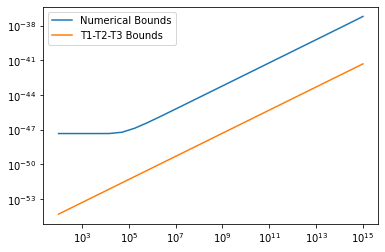

In [500]:
mchi = np.logspace(2,15,25)
rhochi = 10**18
M = np.array((10))
R = np.array((radius(M)))
Msun = 1.9885*10**33
Rsun = 69.634*10**9
G = 6.6743*10**(-8)
vesc = np.sqrt(2*G*(M*Msun)/(R*Rsun))
vbar = 10**6

# numerical bounds
sigmaBounds = sigmabounds(mchi,rhochi,M,R)
sigmaBounds = np.reshape(sigmaBounds, (25,1))

# analytic bounds
sigma0 = 1e-60
sigma = [0 for i in range(len(mchi))]
for i in range(len(mchi)):
    data = (mchi[i], rhochi, M, vbar)
    sigma[i] = fsolve(f, sigma0, args = data)

sigma = sigma
plt.loglog(mchi, sigmaBounds, label = 'Numerical Bounds')
plt.loglog(mchi, sigma, label = 'T1-T2-T3 Bounds')
plt.legend()
plt.show()

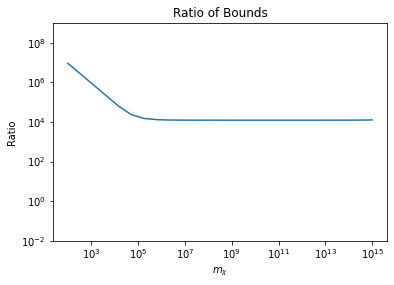

In [497]:
plt.loglog(mchi, sigmaBounds/sigma)
plt.ylim([0.01, 1e9])
plt.title('Ratio of Bounds')
plt.xlabel('$m_\chi$')
plt.ylabel('Ratio')
plt.show()

In [498]:
sigmaBounds/sigma

array([[9370112.97181796],
       [2692019.24548434],
       [ 773413.04633727],
       [ 222200.39520448],
       [  64204.15215129],
       [  23716.21442021],
       [  15177.86926047],
       [  13128.95502758],
       [  12575.323036  ],
       [  12419.16971225],
       [  12374.54527036],
       [  12361.7433586 ],
       [  12358.06881987],
       [  12357.01213637],
       [  12356.70913299],
       [  12356.62553984],
       [  12356.61190213],
       [  12356.64278133],
       [  12356.77541434],
       [  12357.24193773],
       [  12358.87243469],
       [  12364.5465755 ],
       [  12384.35240667],
       [  12454.03426636],
       [  12705.8797215 ]])

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [396]:
np.mean(sigmaBounds/sigma)

12394.780271075133

In [452]:
def SAsigmabounds(mchi,rhochi,M,R):

    mchi = mchi

    # Constants
    Msun = 1.9885*10**33
    Rsun = 69.634*10**9
    mn = 0.93827
    c = 3*10**10
    G = 6.6743*10**(-8)
    rhochi = rhochi
    vbar = 10**6
    Lsun       = 3.846*10**33
    LeddFactor = 3.7142*10**4
    nchi = rhochi/mchi; 
    f = 2/3

    # Star
    M = M
    R = R
        #stuff you calculate for star
    Vesc = np.sqrt(2*G*(M*Msun)/(R*Rsun))

    # Luminosity Calculations
        #Lnuclear
    Lfit1 = (10**(np.log10(LeddFactor*Lsun)/(1+np.exp(-0.8502*np.log10(M)-1.9551))))
    Lfit2 = (M**(2.0135/M**(0.4817)+1))
    Lnuc  = (Lfit1*Lfit2)

        #calculate eddington luminosity
    Ledd = M*LeddFactor*Lsun

    # Define right hand side
    rhs = ((Ledd - Lnuc)/(f*np.sqrt(24*np.pi)*G*(M*Msun)*(R*Rsun)*(1/vbar)))*(1/rhochi)

    ###################################################################################
    
    # Solve for \sigma
    tau = [0 for i in range(1)]
    sigmaBound = [0 for i in range(1)]
    kk = [0 for i in range(1)]

    for i in range(1):
        sigmalow = 10**(-45);              
        sigmaup = 10**(-37);               

        while (np.log10(sigmaup) - np.log10(sigmalow) >= 0.0000000000001):
            sigma = 10**((np.log10(sigmaup)+np.log10(sigmalow))/2)
            tau[i] = 3/2*(M*Msun)/(1.6726*10**(-24))*sigma/np.pi/(R*Rsun)**2
            kk[i] = 3*Vesc**2*0.93827/(vbar**2)/mchi
            lhs = 1 - (2*np.exp(-kk[i]*tau[i])*(-1 + np.exp(kk[i]*tau[i]) - kk[i]*tau[i]))/(kk[i]*tau[i])**2 - ((4*mn)/mchi)*(np.exp(-kk[i]*tau[i])*(-2 + 2*np.exp(kk[i]*tau[i]) - 2*kk[i]*tau[i] - (kk[i]*tau[i])**2))/((kk[i]**3)*(tau[i]**2))
            if (lhs >= rhs):
                sigmaup = sigma      
            else:
                sigmalow = sigma
        sigmaBound[i] = sigma
    return sigmaBound

In [453]:
mchi = np.logspace(2,15,25)
M = np.array(10)
R = np.array(radius(M))
rhochi = np.array(10**18)

SAsigmabounds_out = [0 for i in range(len(mchi))]
for i in range(len(mchi)):
    SAsigmabounds_out[i] = SAsigmabounds(mchi[i],np.array(10**18),np.array(10),np.array(radius(10)))

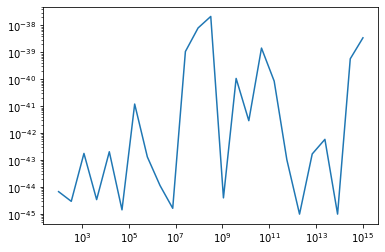

In [454]:
plt.loglog(mchi, SAsigmabounds_out)